In [2]:
# First, let's read the uploaded CSV file to understand its structure and content.
import pandas as pd

# Load the CSV file
file_path = 'ReturnsS&P.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,Year,Month,Return (%),Amount ($)
0,1900,1,0.0210,102.10
1,1900,2,0.0111,103.23
2,1900,3,0.0159,104.87
3,1900,4,-0.0442,100.24
4,1900,5,-0.0264,97.59


In [3]:
# Convert the Year and Month to a datetime format for easier manipulation
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Set the starting point
start_date = pd.to_datetime('2023-09-01')
start_price = 4507.66

# Filter the dataframe to include only dates up to the start date
data_before_start = data[data['Date'] < start_date]

# Sort the data in reverse chronological order to work backwards
data_before_start_sorted = data_before_start.sort_values(by='Date', ascending=False)

# Calculate the prices backwards
# Initialize the price with the starting price
data_before_start_sorted['Calculated Price'] = start_price

# Iterate through the dataframe backwards to adjust the price based on the return
for i in range(1, len(data_before_start_sorted)):
    # The price of the previous month is the current price divided by (1 + return of the current month)
    data_before_start_sorted.iloc[i, data_before_start_sorted.columns.get_loc('Calculated Price')] = \
        data_before_start_sorted.iloc[i-1]['Calculated Price'] / (1 + data_before_start_sorted.iloc[i-1]['Return (%)'])

# Display the first few rows of the adjusted dataframe to verify the calculation
data_before_start_sorted.head()


,Year,Month,Return (%),Amount ($),Date,Calculated Price
1483,2023,8,0.0131,10663186.24,2023-08-01,4507.660000
1482,2023,7,-0.0113,10525258.35,2023-07-01,4449.373211
1481,2023,6,0.0388,10645017.05,2023-06-01,4500.225762
1480,2023,5,0.0494,10247807.72,2023-05-01,4332.138777
1479,2023,4,0.0074,9765193.62,2023-04-01,4128.205429


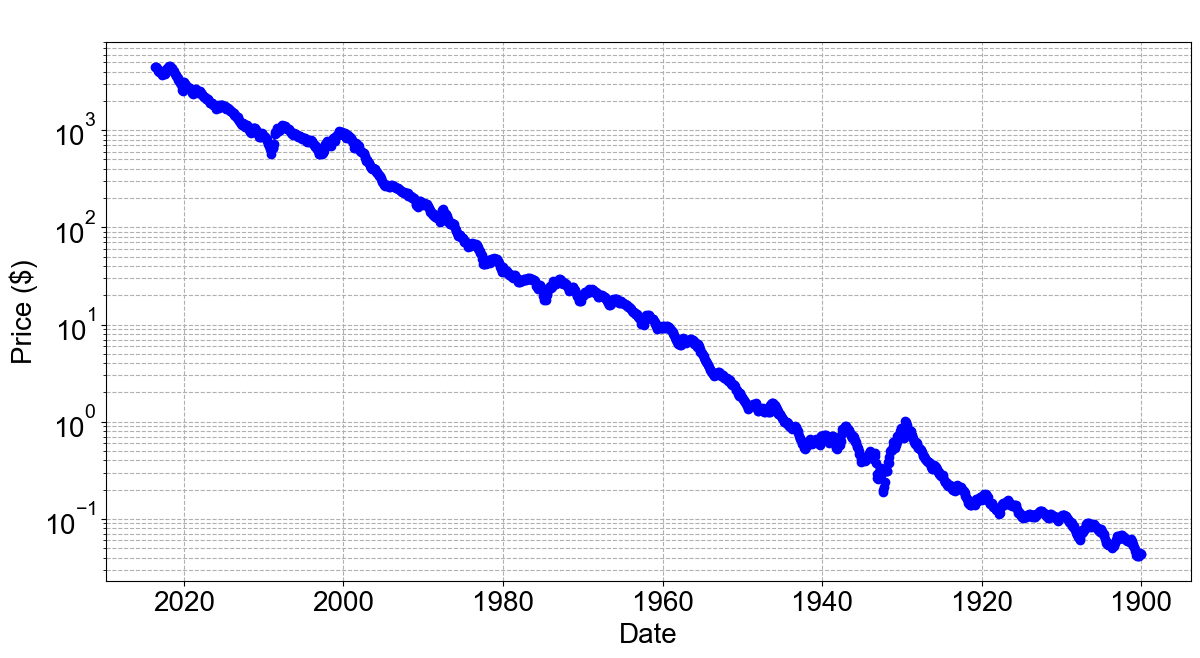

In [4]:
import matplotlib.pyplot as plt

# Plotting the Date against the Calculated Price with a logarithmic y-axis
plt.figure(figsize=(14, 7))
plt.plot(data_before_start_sorted['Date'], data_before_start_sorted['Calculated Price'], marker='o', linestyle='-', color='blue')

plt.title('S&P Prices Over Time (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.grid(True, which="both", ls="--")

plt.gca().invert_xaxis()  # Invert the x-axis to display older dates on the right

plt.show()


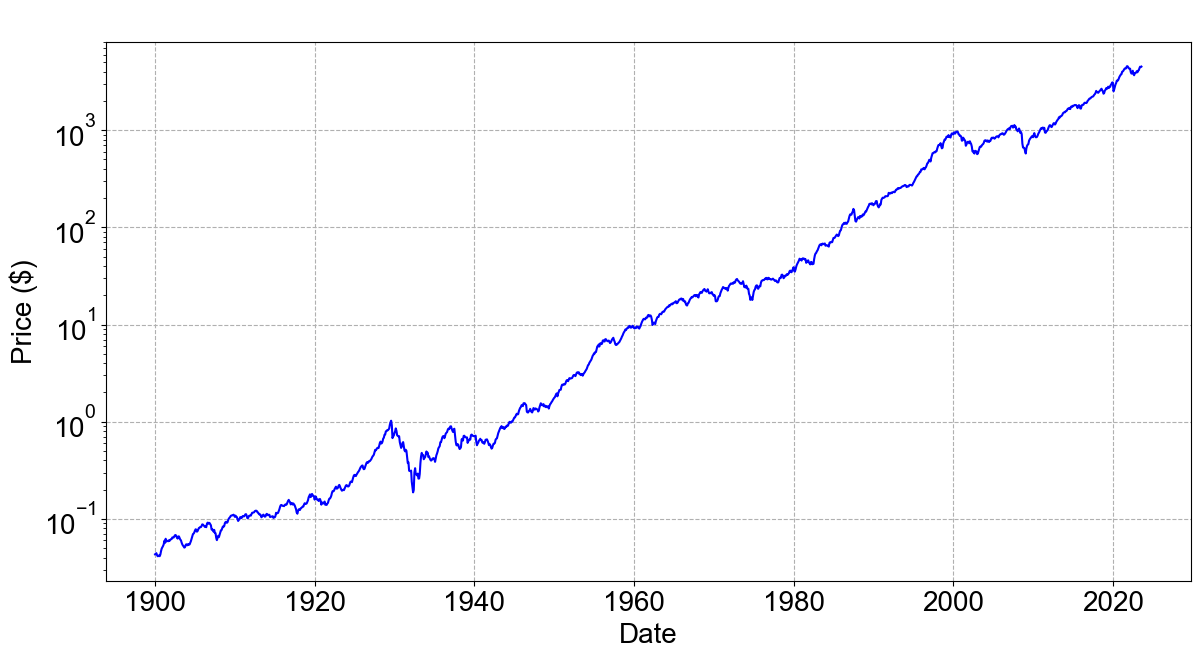

In [5]:
# Plotting the Date against the Calculated Price with a logarithmic y-axis and reversing the date order
plt.figure(figsize=(14, 7))
plt.plot(data_before_start_sorted['Date'], data_before_start_sorted['Calculated Price'], linestyle='-', color='blue')

plt.title('S&P Prices Over Time (Log Scale, Date Order Reversed)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.grid(True, which="major", ls="--")

# No need to invert the x-axis this time as we want newer dates on the right which is the default

plt.show()


1982-10-01 00:00:00
1982-07-01 00:00:00
53.8145183874105 42.191934931197125
1975-02-01 00:00:00
1974-11-01 00:00:00
22.61466759017476 17.89766096032654
1938-07-01 00:00:00
1938-04-01 00:00:00
0.6668463144237525 0.532051269977071
1938-06-01 00:00:00
1938-03-01 00:00:00
0.6598518844485974 0.5238787613007788
1933-06-01 00:00:00
1933-03-01 00:00:00
0.4778810364330281 0.28976841485283905
1933-05-01 00:00:00
1933-02-01 00:00:00
0.4406057868643077 0.260489405656993
1933-04-01 00:00:00
1933-01-01 00:00:00
0.37472851408769153 0.2596326180175351
1932-09-01 00:00:00
1932-06-01 00:00:00
0.2883900119307663 0.19894228478597561
1932-08-01 00:00:00
1932-05-01 00:00:00
0.3323231296736187 0.18736323675454475
1932-07-01 00:00:00
1932-04-01 00:00:00
0.3010991480235741 0.21386056015813806


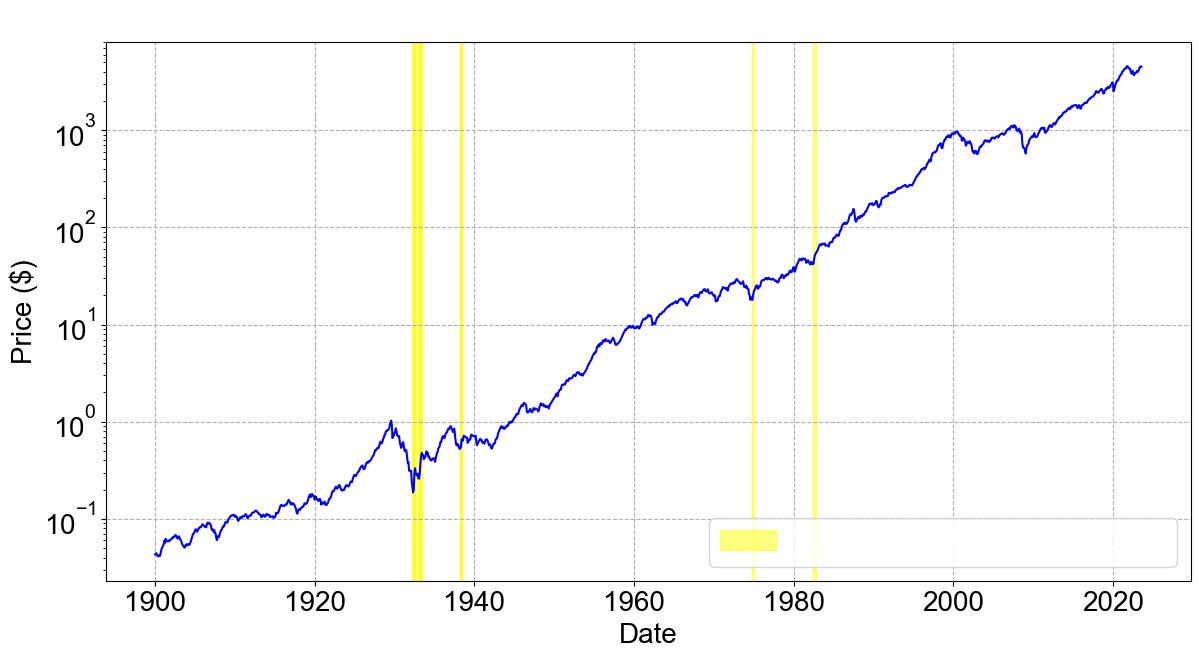

In [6]:
# Define a function to identify significant drops within the data
def identify_significant_drops(df, threshold=-20, period_months=4):
    """
    Identifies significant drops in the S&P prices over a specified period.

    Parameters:
    - df: DataFrame with the historical prices and dates.
    - threshold: The percentage drop that qualifies as significant (negative value).
    - period_months: The number of months over which to calculate the drop.

    Returns:
    - A list of dictionaries with the start and end dates of identified drops.
    """
    significant_drops = []
    for i in range(len(df) - period_months + 1):
        # Calculate the percentage change over the period
        start_price = df.iloc[i]['Calculated Price']
        end_price = df.iloc[i + period_months-1]['Calculated Price']
        percentage_change = ((end_price - start_price) / start_price) * 100

        # If the drop meets the threshold, record the period
        if percentage_change <= threshold:
            print(df.iloc[i]['Date'])
            
            print(df.iloc[i + period_months - 1]['Date'])
            print(start_price,end_price)
            significant_drops.append({
                'start': df.iloc[i]['Date'],
                'end': df.iloc[i + period_months - 1]['Date'],
                'drop': percentage_change
            })
    
    return significant_drops

# Use the function to identify significant drops in the data
significant_drops = identify_significant_drops(data_before_start_sorted)

# Display the identified significant drops
significant_drops

# Plotting the Date against the Calculated Price with ONLY the algorithmically identified significant drops highlighted

plt.figure(figsize=(14, 7))

# Main data
plt.plot(data_before_start_sorted['Date'], data_before_start_sorted['Calculated Price'], linestyle='-', color='blue')

# Highlighting algorithmically identified significant drops only
for drop in significant_drops:
    plt.axvspan(drop['start'], drop['end'], color='yellow', alpha=0.5, label='Algorithmically Identified Drop')

plt.title('S&P Prices Over Time (Only Algorithmically Identified Drops Highlighted)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.grid(True, which="major", ls="--")

# Removing duplicate labels from the legend
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys())

plt.show()



In [7]:
# Correcting the approach for identifying significant drops
# The initial approach may have incorrectly calculated percentage changes or misinterpreted dates

# Re-implementing the function to correctly identify significant drops, considering the correct direction of time

def correct_significant_drops(df, threshold=-20, period_months=3):
    significant_drops_corrected = []

    # Calculate the percentage change over the specified period correctly
    for i in range(len(df) - period_months + 1):
        start_price = df.iloc[i]['Calculated Price']
        end_price = df.iloc[i + period_months - 1]['Calculated Price']
        percentage_change = ((end_price - start_price) / start_price) * 100

        # Check for significant drops, considering the correct direction
        if percentage_change <= threshold:
            significant_drops_corrected.append({
                'start': df.iloc[i]['Date'],
                'end': df.iloc[i + period_months - 1]['Date'],
                'drop': percentage_change
            })

    return significant_drops_corrected

# Correctly identify significant drops with the new function
significant_drops_corrected = correct_significant_drops(data_before_start_sorted)

# Display the corrected identified significant drops
significant_drops_corrected


[{'start': Timestamp('1933-06-01 00:00:00'),
  'end': Timestamp('1933-04-01 00:00:00'),
  'drop': -21.585397720587878},
 {'start': Timestamp('1933-05-01 00:00:00'),
  'end': Timestamp('1933-03-01 00:00:00'),
  'drop': -34.23408781916922},
 {'start': Timestamp('1933-04-01 00:00:00'),
  'end': Timestamp('1933-02-01 00:00:00'),
  'drop': -30.485832845900006},
 {'start': Timestamp('1932-08-01 00:00:00'),
  'end': Timestamp('1932-06-01 00:00:00'),
  'drop': -40.135889734379646},
 {'start': Timestamp('1932-07-01 00:00:00'),
  'end': Timestamp('1932-05-01 00:00:00'),
  'drop': -37.77357459016277}]

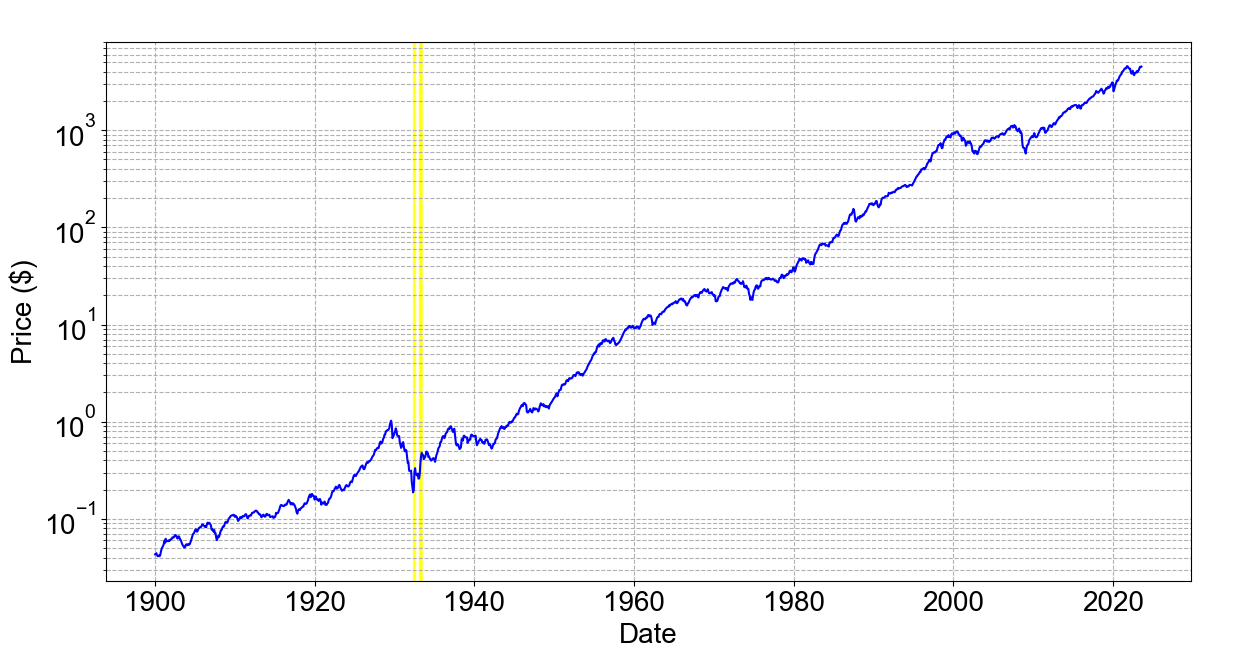

In [8]:
# Correcting the visualization to accurately reflect the identified drops

plt.figure(figsize=(14, 7))

# Main data
plt.plot(data_before_start_sorted['Date'], data_before_start_sorted['Calculated Price'],  linestyle='-', color='blue')

# Correcting the visualization of significant drops
# Ensuring the start and end dates are accurately represented
for drop in significant_drops_corrected:
    # Highlight each identified significant drop period
    plt.axvspan(drop['end'], drop['start'], color='yellow', alpha=0.5)  # Note the reversed order for start and end

plt.title('Corrected S&P Prices Over Time (Algorithmically Identified Drops Highlighted)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.grid(True, which="both", ls="--")

plt.show()


NameError: name 'last_date' is not defined

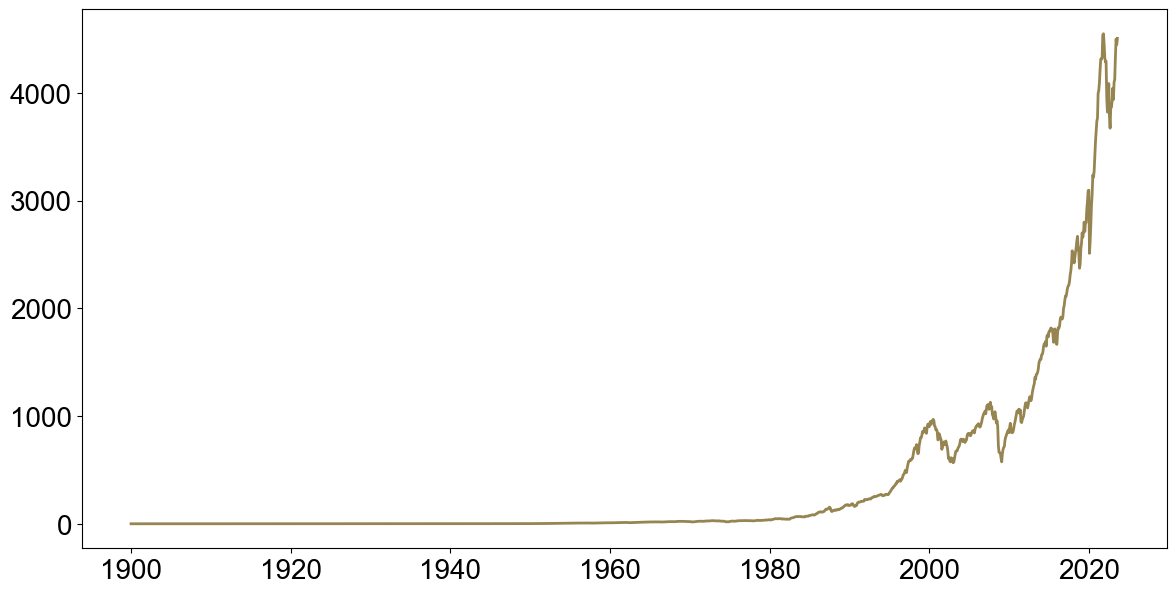

In [9]:
# Define a new approach to accurately identify significant price drops

def find_price_drops(df, percentage_drop=-30, window=6):
    """
    Identifies significant price drops within the dataset based on a rolling window.
    This function specifically looks for actual declines in value, considering the direction of time properly.

    Parameters:
    - df: DataFrame with dates and prices.
    - percentage_drop: The percentage decrease that qualifies as significant.
    - window: The number of consecutive months to consider for a drop.

    Returns:
    - A DataFrame with start and end dates of significant drops and the percentage drop, merging overlapping periods.
    """
    drops = []
    # Iterate through the DataFrame in chronological order
    for i in range(window, len(df)):
        start_price = df.iloc[i - window]['Calculated Price']
        end_price = df.iloc[i]['Calculated Price']
        percent_change = 100 * (end_price - start_price) / start_price
        if percent_change <= percentage_drop:
            drops.append({
                'start': df.iloc[i - window]['Date'],
                'end': df.iloc[i]['Date'],
                'percent_change': percent_change
            })
    
    # Sort drops by start date
    drops = sorted(drops, key=lambda x: x['start'])
    
    # Merge overlapping periods
    merged_drops = []
    for drop in drops:
        if not merged_drops:
            merged_drops.append(drop)
        else:
            last_drop = merged_drops[-1]
            if drop['start'] <= last_drop['end']:
                # Extend the end date of the last drop if the current drop ends later
                last_drop['end'] = max(last_drop['end'], drop['end'])
                last_drop['percent_change'] = min(last_drop['percent_change'], drop['percent_change'])
            else:
                merged_drops.append(drop)
                
    return pd.DataFrame(merged_drops)

# Apply the new function to identify significant drops
significant_drops_df = find_price_drops(data_before_start_sorted.sort_values(by='Date'), -23, 12)

plt.figure(figsize=(14, 7))
plt.plot(data_before_start_sorted['Date'], data_before_start_sorted['Calculated Price'], linestyle='solid', color='#968451', linewidth=2)
significant_periods = []
for _, row in significant_drops_df.iterrows():
    significant_periods.append((row['start'], row['end']))
for i, row in data_before_start_sorted.iterrows():
    date = row['Date']
    price = row['Calculated Price']
    if last_date is not None:
        # Check if this segment falls within any significant drop period
        in_drop = any(start <= last_date and end >= date for start, end in significant_periods)
        color = '#353475' if in_drop else '#968451'
        plt.plot([last_date, date], [last_price, price], linestyle='solid', color=color, linewidth=2)
    last_date = date
    last_price = price

# Highlight the corrected drops with the new color
for _, row in significant_drops_df.iterrows():
    plt.axvspan(row['start'], row['end'], color='#004156', alpha=0.3)

plt.title('S&P500')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.grid(True, which="major", ls="solid")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_before_start_sorted' and 'significant_drops_df' are defined and correctly populated



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def find_price_drops(df, percentage_drop=-30, window=6):
    """
    Identifies significant price drops within the dataset based on a rolling window.
    This function specifically looks for actual declines in value, considering the direction of time properly.

    Parameters:
    - df: DataFrame with dates and prices.
    - percentage_drop: The percentage decrease that qualifies as significant.
    - window: The number of consecutive months to consider for a drop.

    Returns:
    - A DataFrame with start and end dates of significant drops and the percentage drop, merging overlapping periods.
    """
    drops = []
    for i in range(window, len(df)):
        start_price = df.iloc[i - window]['Calculated Price']
        end_price = df.iloc[i]['Calculated Price']
        percent_change = 100 * (end_price - start_price) / start_price
        if percent_change <= percentage_drop:
            drops.append({
                'start': df.iloc[i - window]['Date'],
                'end': df.iloc[i]['Date'],
                'percent_change': percent_change
            })
    
    drops = sorted(drops, key=lambda x: x['start'])
    
    merged_drops = []
    for drop in drops:
        if not merged_drops:
            merged_drops.append(drop)
        else:
            last_drop = merged_drops[-1]
            if drop['start'] <= last_drop['end']:
                last_drop['end'] = max(last_drop['end'], drop['end'])
                last_drop['percent_change'] = min(last_drop['percent_change'], drop['percent_change'])
            else:
                merged_drops.append(drop)
                
    return pd.DataFrame(merged_drops)

# Assuming 'data_before_start_sorted' is already defined and sorted by 'Date'
significant_drops_df = find_price_drops(data_before_start_sorted, -23, 12)

plt.figure(figsize=(14, 7), facecolor='#FFFFFF')

# Plot the original line in its default color
plt.plot(data_before_start_sorted['Date'], data_before_start_sorted['Calculated Price'], linestyle='solid', color='#968451', linewidth=2, alpha=1)  # Make original line less prominent

# Go through each drop and plot the segment in yellow
last_date = None
for i, row in data_before_start_sorted.iterrows():
    date = row['Date']
    price = row['Calculated Price']
    if last_date is not None:
        # Check if this segment falls within any significant drop period
        in_drop = any(start <= last_date and end >= date for start, end in significant_periods)
        color = '#353475' if in_drop else '#968451'
        plt.plot([last_date, date], [last_price, price], linestyle='solid', color=color, linewidth=2)
    last_date = date
    last_price = price
    
# # Add the shaded areas for significant drops (optional, as the line color now indicates drops)
for start, end in significant_periods:
    plt.axvspan(start, end, color='#004156', alpha=0.3)

plt.title('S&P500 Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.yscale('log')
# plt.grid(False)
plt.show()


In [ ]:
data_before_start_sorted

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data_before_start_sorted` and `significant_drops_df` are defined as per your existing code

plt.figure(figsize=(14, 7))

# Convert dates to a format that matplotlib can understand (if they're not already in such format)
data_before_start_sorted['Date'] = pd.to_datetime(data_before_start_sorted['Date'])
significant_drops_df['start'] = pd.to_datetime(significant_drops_df['start'])
significant_drops_df['end'] = pd.to_datetime(significant_drops_df['end'])

# Create a list of periods with significant drops for easy checking
significant_periods = []
for _, row in significant_drops_df.iterrows():
    significant_periods.append((row['start'], row['end']))

# Plot each segment individually, changing color if within a significant drop period
last_date = None
for i, row in data_before_start_sorted.iterrows():
    date = row['Date']
    price = row['Calculated Price']
    if last_date is not None:
        # Check if this segment falls within any significant drop period
        in_drop = any(start <= last_date and end >= date for start, end in significant_periods)
        color = '#353475' if in_drop else '#968451'
        plt.plot([last_date, date], [last_price, price], linestyle='solid', color=color, linewidth=2)
    last_date = date
    last_price = price

# Add the shaded areas for significant drops (optional, as the line color now indicates drops)
for start, end in significant_periods:
    plt.axvspan(start, end, color='#004156', alpha=0.3)

plt.title('S&P500')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.grid(True, which="major", ls="solid")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data_before_start_sorted` and `significant_drops_df` are defined as per your existing code

plt.figure(figsize=(14, 7))

# Convert dates to a format that matplotlib can understand (if they're not already in such format)
data_before_start_sorted['Date'] = pd.to_datetime(data_before_start_sorted['Date'])
significant_drops_df['start'] = pd.to_datetime(significant_drops_df['start'])
significant_drops_df['end'] = pd.to_datetime(significant_drops_df['end'])

# Create a list of periods with significant drops for easy checking
# significant_periods = []
# for _, row in significant_drops_df.iterrows():
#     significant_periods.append((row['start'], row['end']))

# Plot each segment individually, changing color if within a significant drop period
last_date = None
for i, row in data_before_start_sorted.iterrows():
    date = row['Date']
    price = row['Calculated Price']
    if last_date is not None:
        # Check if this segment falls within any significant drop period
        in_drop = any(start <= last_date and end >= date for start, end in significant_periods)
        color = 'yellow' if in_drop else '#968451'
        plt.plot([last_date, date], [last_price, price], linestyle='solid', color=color, linewidth=2)
    last_date = date
    last_price = price

# # Add the shaded areas for significant drops (optional, as the line color now indicates drops)
# for start, end in significant_periods:
#     plt.axvspan(start, end, color='#004156', alpha=0.3)

plt.title('S&P500')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.grid(True, which="major", ls="solid")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the default color of all text elements to white
rcParams['text.color'] = 'white'

# Assuming 'data_before_start_sorted' and 'significant_periods' are already defined
plt.figure(figsize=(14, 7), facecolor='#DFDDBD')

# Changing the face and edge color of the plot
ax = plt.gca()
ax.set_facecolor('#DFDDBD')
ax.spines['bottom'].set_color('#004156')
ax.spines['top'].set_color('#DFDDBD') 
ax.spines['right'].set_color('#DFDDBD')
ax.spines['left'].set_color('#004156')

# Changing the color of the ticks
ax.tick_params(axis='x', colors='#004156')
ax.tick_params(axis='y', colors='#004156')

# Plot the original line
plt.plot(data_before_start_sorted['Date'], data_before_start_sorted['Calculated Price'], linestyle='solid', color='#968451', linewidth=2, alpha=1)

# Go through each drop and plot the segment
last_date = None
for i, row in data_before_start_sorted.iterrows():
    date = row['Date']
    price = row['Calculated Price']
    if last_date is not None:
        # Check if this segment falls within any significant drop period
        in_drop = any(start <= last_date and end >= date for start, end in significant_periods)
        color = '#968451' if in_drop else '#968451'
        plt.plot([last_date, date], [last_price, price], linestyle='solid', color=color, linewidth=2)
    last_date = date
    last_price = price

# # Adding shaded areas for significant drops (optional)
# for start, end in significant_periods:
#     plt.axvspan(start, end, color='#004156', alpha=0.3)

# Set title and labels with white color explicitly
plt.title('S&P500', color='#004156')
plt.xlabel('Date', color='#004156')
plt.ylabel('Price ($)', color='#004156')
plt.yscale('log')
plt.grid(False)
plt.savefig('plot.png')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the default color of all text elements to white
rcParams['text.color'] = 'white'

# Set font family and size
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 15

# Assuming 'data_before_start_sorted' and 'significant_periods' are already defined
plt.figure(figsize=(14, 7), facecolor='#DFDDBD')

# Changing the face and edge color of the plot
ax = plt.gca()
ax.set_facecolor('#DFDDBD')
ax.spines['bottom'].set_color('#004156')
ax.spines['top'].set_color('#DFDDBD') 
ax.spines['right'].set_color('#DFDDBD')
ax.spines['left'].set_color('#004156')

# Changing the color of the ticks
ax.tick_params(axis='x', colors='#004156')
ax.tick_params(axis='y', colors='#004156')

# Plot the original line
plt.plot(data_before_start_sorted['Date'], data_before_start_sorted['Calculated Price'], linestyle='solid', color='#968451', linewidth=2, alpha=1)

# Go through each drop and plot the segment
last_date = None
for i, row in data_before_start_sorted.iterrows():
    date = row['Date']
    price = row['Calculated Price']
    if last_date is not None:
        # Check if this segment falls within any significant drop period
        in_drop = any(start <= last_date and end >= date for start, end in significant_periods)
        color = '#968451' if in_drop else '#968451'
        plt.plot([last_date, date], [last_price, price], linestyle='solid', color=color, linewidth=2)
    last_date = date
    last_price = price

# Set title and labels with white color explicitly
plt.title('S&P500', color='#004156')

plt.ylabel('Price ($)', color='#004156')
plt.yscale('log')
plt.grid(False)
plt.savefig('plot.png')
plt.show()


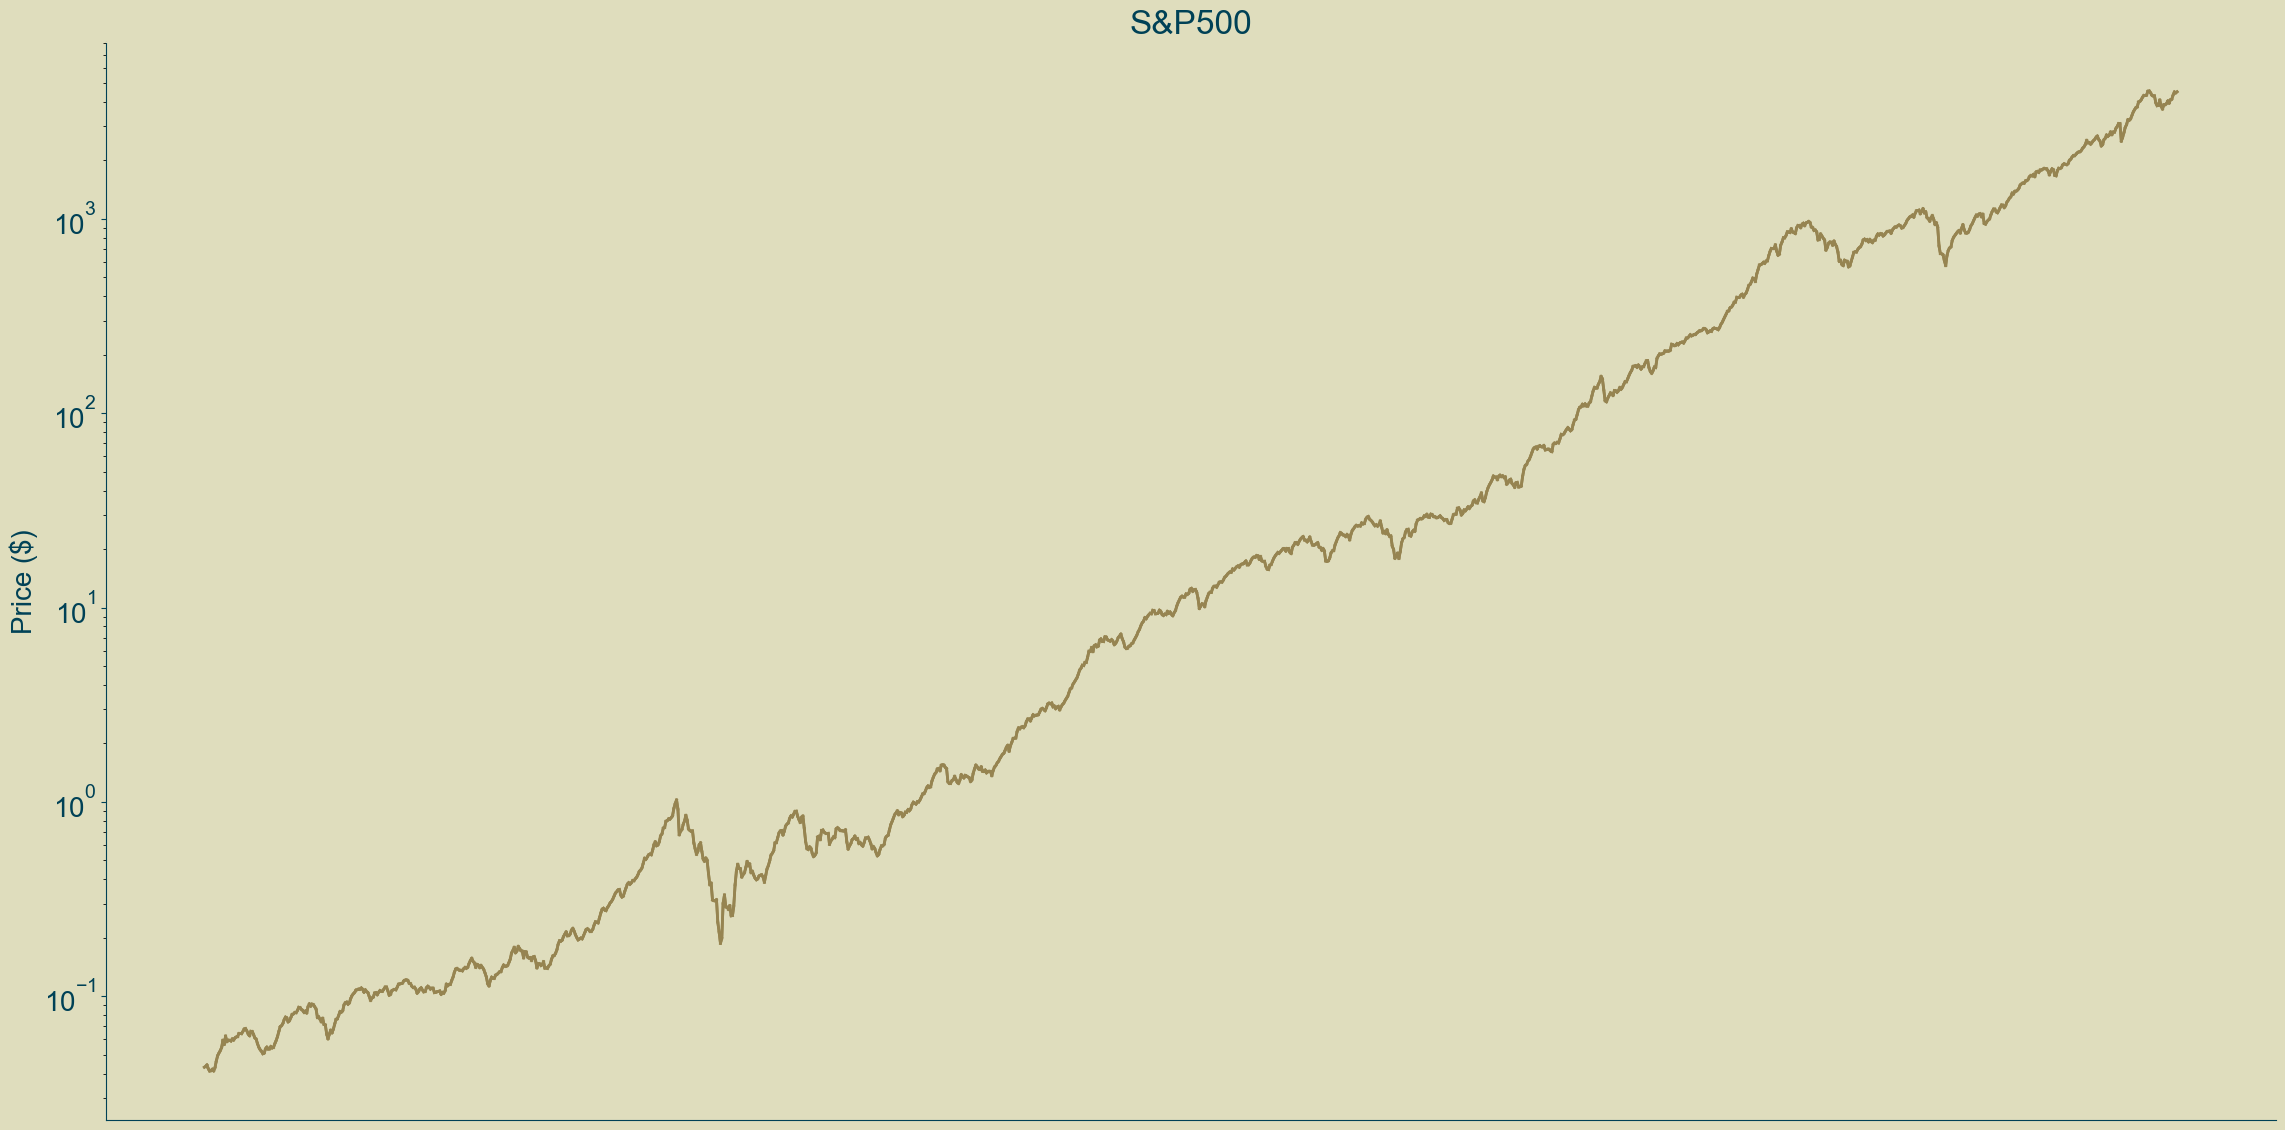

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the default color of all text elements to white
rcParams['text.color'] = 'white'

# Set font family and size
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 14  # Increased font size

# Assuming 'data_before_start_sorted' and 'significant_periods' are already defined
plt.figure(figsize=(28, 14), facecolor='#DFDDBD')

# Changing the face and edge color of the plot
ax = plt.gca()
ax.set_facecolor('#DFDDBD')
ax.spines['bottom'].set_color('#004156')
ax.spines['top'].set_color('#DFDDBD') 
ax.spines['right'].set_color('#DFDDBD')
ax.spines['left'].set_color('#004156')

# Changing the color of the ticks
ax.tick_params(axis='x', colors='#004156')
ax.tick_params(axis='y', colors='#004156')

# Plot the original line
plt.plot(data_before_start_sorted['Date'], data_before_start_sorted['Calculated Price'], linestyle='solid', color='#968451', linewidth=2, alpha=1)

# Go through each drop and plot the segment
last_date = None
for i, row in data_before_start_sorted.iterrows():
    date = row['Date']
    price = row['Calculated Price']
    if last_date is not None:
        # Check if this segment falls within any significant drop period
        in_drop = any(start <= last_date and end >= date for start, end in significant_periods)
        color = '#968451' if in_drop else '#968451'
        plt.plot([last_date, date], [last_price, price], linestyle='solid', color=color, linewidth=2)
    last_date = date
    last_price = price

# Set title and labels with white color explicitly
plt.title('S&P500', color='#004156')

plt.ylabel('Price ($)', color='#004156')
plt.yscale('log')

# Customize x-axis ticks to show every two years
plt.xticks(pd.date_range(data_before_start_sorted['Date'].iloc[0], data_before_start_sorted['Date'].iloc[-1], freq='2Y'), rotation=45)

plt.grid(False)
plt.savefig('plot.png')
plt.show()


In [13]:
data_before_start_sorted[['Date','Calculated Price']].to_csv('sp5001900.csv')

In [ ]:
StockScreenerStocks = [
'CRVL',
'GWW',
'MEDP',
'MANH',
'AVGO',
'WSM',
'MLI',
'KLAC',
'ATKR',
'FIX',
'CF',
'ON',
'SKY',
'SMCI',
'PHM',
'HUBB',
'NVR',
'AOS',
'COKE',
'AAPL',
'BCC',
'PBF',
'AIT',
'BLDR',
'POOL',
'MSFT',
'SSD',
'CDNS',
'EXP',
'MUSA',
'ANET',
'AAON',
'MGY',
'SWN',
'DHI',
'WTS',
'CTAS',
'GOOG',
'IT',
'ITW',
'IPAR',
'BRKR',
'UFPI',
'DE',
'FTNT',
'QLYS',
'ADSK',
'NVDA',
'LSCC',
'HRB',
'TOL',
'GOOGL',
'LII',
'AN',
'WES',
'MSI',
'DKS',
'CMG',
'FAST',
'SAIA',
'ALSN',
'OVV',
'WSO',
'MTDR',
'MTH',
'IBP',
'CHDN',
'IR',
'BLD',
'AMAT',
'TMHC',
'LRCX',
'MA',
'LECO',
'ABG',
'NUE',
'URI',
'SNA',
'WAT',
'CMC',
'ITT',
'ELF',
'TSCO',
'ALB',
'TNET',
'EME',
'VLO',
'FSS',
'STLD',
'MCHP',
'MPC',
'EXLS',
'CNM',
'ODFL',
'EOG',
'RS',
'ULTA',
'OC',
'SCCO',
'MTD',
'CAT',
'PCAR',
'META',
'NEU',
'SYY',
'WSO.B',
'ACI',
'TTEK',
'ALGM',
'MCO',
'DDS',
'FN',
'BMI',
'CDW',
'GILD',
'CE',
'EXPD',
'LEN.B',
'JBL',
'V',
'HD',
'ZTS',
'IPG',
'AMG',
'LSTR',
'LLY',
'PXD',
'CHK',
'TJX',
'FELE',
'PAG',
'GPK',
'RHI',
'WST',
'MPWR',
'LEN',
'ENPH',
'SUN',
'VRSK',
'IBM',
'PH',
'AGCO',
'CBOE',
'VVV',
'MOH',
'NXT',
'SHW',
'UNH',
'GEN',
'DECK',
'PAYX',
'TXN',
'SNPS',
'HESM',
'SPSC',
'BR',
'COP',
'SUM',
'TSLA',
'PSX',
'SFM',
'BKNG',
'FDS',
'NOW',
'BJ',
'GOLF'
'SEIC'
'RRC'
'ADP'
'IDXX'
'VRTX'
'APH'
'DINO'
'MMC'
'LW'
'CLH'
'CIVI'
'MSM'
'TXRH'
'ROL'
'APA'
'HSY'
'WM'
'WMB'
'CPRT'
'HLNE'
'TPL'
'CROX'
'COST'
'WCC'
'CBT'
'MOG.B'
'NKE'
'A'
'CELH'
'AYI'
'GGG'
'KNSL'
'LMT'
'DOV'
'UNP'
'KBH'
'BC'
'FANG'
'MRO'
'CSCO'
'MLM'
'NDSN'
'JBHT'
'SEE'
'ASO'
'FMC'
'UPS'
'TPX'
'ORCL'
'KEYS'
'RL'
'DXCM'
'ATI'
'PEP'
'NSIT'
'VNOM'
'DELL'
'TREX'
'ONTO'
'NFLX'
'SKX'
'GPC'
'LKQ'
'ROK'
'CHH'
'RPM'
'RLI'
'CTRA'
'ADBE'
'CSL'
'ISRG'
'OMC'
'IEX'
'WLK'
'RRR'
'AMGN'
'CSX'
'BSY'
'KO'
'MKTX'
'CL'
'CHE'
'PR'
'AXP'
'CASY'
'HWM'
'INTU'
'AMP'
'WH'
'SCI'
'DRI'
'AVY'
'ACT'
'BYD'
'ERIE'
'MOG.A'
'AFG'
'NOVT'
'DCI'
'RMBS'
'COR'
'WU'
'PG'
'PKG'
'WMS'
'PII'
'ROST'
'MNST'
'PAYC'
'THC'
'ABBV'
'INGR'
'MIDD'
'DOCS'
'NXST'
'QCOM'
'MSTR'
'RSG'
'DFS'
'ARW'
'MAR'
'WRB'
'HIG'
'AME'
'TROW'
'SYK'
'EPAM'
'FCFS'
'HON'
'DVN'
'ELV'
'HOG'
'PTC'
'REGN'
'SWAV'
'AEL'
'EBAY'
'BF.A'
'TXT'
'EPD'
'EW'
'AWI'
'EVR'
'BWXT'
'SM'
'WAB'
'BCPC'
'OPCH'
'AMR'
'BAH'
'GD'
'OKE'
'PPG'
'RDN'
'VMI'
'MMSI'
'BF.B'
'VNT'
'GNTX'
'JKHY'
'IQV'
'TTC'
'DG'
'VEEV'
'XYL'
'APD'
'EQT'
'KMB'
'FLT'
'NTAP'
'MTG'
'ADI'
'FCN'
'MPLX'
'PFG'
'ECL'
'RMD'
'FIZZ'
'PYPL'
'FFIV'
'GIS'
'HII'
'OLN'
'ABNB'
'TW'
'HLI'
'M'
'J'
'LPLA'
'AXON'
'BLK'
'MDLZ'
'VMC'
'AFL'
'LFUS'
'ADM'
'PGR'
'EHC'
'SAIC'
'RH'
'TKR'
'SITE'
'SON'
'SPXC'
'VOYA'
'ANF'
'FBIN'
'DVA'
'AM'
'ENSG'
'SLM'
'GE'
'KMI'
'EFX'
'DOX'
'CARR'
'CINF'
'CHX'
'UTHR'
'CW'
'FIVE'
'AMKR'
'FUL'
'FND'
'AR'
'CTSH'
'CRL'
'DAR'
'CPB'
'ESAB'
'KR'
'EXEL'
'PODD'
'GATX'
'HXL'
'ET'
'CI'
'ENLC'
'TECH'
'DV'
'SYF'
'LAD'
'CHRD'
'MKL'
'AIG'
'TER'
'GL'
'BG'
'UNM'
'BRK.A'
'PRI'
'FI'
'CHRW'
'CRUS'
'TRGP'
'MUR'
'BRK.B'
'CRBG'
'RJF'
'HALO'
'HEI'
'BRO'
'PWR'
'MMS'
'JNJ'
'BEN'
'ASGN'
'NYT'
'MTN'
'FDX'
'HUM'
'MDU'
'BURL'
'NDAQ'
'RCL'
'K'
'EQH'
'TMUS'
'ZM'
'XOM'
'EXPE'
'HES'
'CHD'
'BERY'
'ROP'
'CHTR'
'ABT'
'HGV'
'SWKS'
'FTAI'
'CVX'
'RBA'
'MGM'
'HAL'
'VTRS'
'COF'
'OXY'
'OLED'
'LEA'
'PFGC'
'ACHC'
'WMT'
'DLTR'
'LANC'
'OMF'
'YETI'
'TPR'
'ALGN'
'LYV'
'CMCSA'
'GEHC'
'HEI.A'
'CWST'
'EMR'
'ANSS'
'TDY'
'SLGN'
'AIZ'
'BMY'
'COLM'
'SIGI'
'ZBRA'
'CME'
'SPGI'
'ORI'
'PCTY'
'OSK'
'COOP'
'BALL'
'LSXMK'
'EA'
'LSXMB'
'CACC'
'LSXMA'
'NE'
'AXTA'
'MDC'
'WWD'
'FCX'
'RBC'
'TRV'
'DAL'
'SLB'
'SCHW'
'NOC'
'IPGP'
'CNC'
'OLLI'
'UHS'
'FLS'
'RGEN'
'DGX'
'TKO'
'CNA'
'NBIX'
'BK'
'JXN'
'USFD'
'EEFT'
'BDX'
'SAM'
'AKAM'
'TMO'
'MATX'
'REYN'
'DTM'
'SNDR'
'EMN'
'NSC'
'AJG'
'AZPN'
'ESI'
'GS'
'WSC'
'SNX'
'HSIC'
'TGT'
'CGNX'
'NOV'
'FG'
'DHR'
'AMZN'
'BBY'
'MS'
'ACM'
'LNW'
'CVS'
'FOUR'
'ATR'
'ETRN'
'IBKR'
'PANW'
'WMG'
'UHAL'
'COO'
'PPC'
'LPX'
'MAT'
'THO'
'BSX'
'PAA'
'TFX'
'FLR'
'GM'
'FOXA'
'DT'
'H'
'CNXC'
'AEO'
'KNX'
'LVS'
'LBRDA'
'MTCH'
'CCK'
'JEF'
'KEX'
'MTSI'
'PFSI'
'RGLD'
'FNF'
'WFRD'
'STT'
'LH'
'LBRDK'
'IAC'
'MRK'
'COTY'
'FSLR'
'JNPR'
'DLB'
'SF'
'APG'
'BKR'
'CLX'
'CPNG'
'STWD'
'MKC.V'
'STZ'
'CACI'
'MKC'
'PTEN'
'HLT'
'UHAL.B'
'MET'
'ALTR'
'PSN'
'MOS'
'GME'
'ASH'
'POWI'
'PEN'
'NTRS'
'IP'
'BWA'
'VRT'
'CRM'
'ICE'
'KDP'
'NFE'
'HOLX'
'BECN'
'KHC'
'ZBH'
'HPE'
'WHR'
'HRL'
'CMI'
'SSNC'
'ARMK'
'R'
'FOX'
'DRS'
'XPO'
'AMD'
'ALLY'
'INCY'
'LHX'
'EL'
'CTVA'
'PVH'
'TRMB'
'GTLS'
'PFE'
'HUN'
'FTV'
'FAF'
'INTC'
'FLO'
'L'
'RGA'
'TYL'
'CYTK'
'CNNE'
'KVUE'
'BIIB'
'CAG'
'GLW'
'X'
'DOW'
'AZEK'
'NWS'
'DUOL'
'NWSA'
'UAL'
'UBER'
'GMED'
'FWONK'
'MASI'
'VZ'
'KBR'
'FWONA'
'TTD'
'MSA'
'APPF'
'WEX'
'RVTY'
'TAP'
'PCVX'
'RYAN'
'WTM'
'RKT'
'ALL'
'F'
'DDOG'
'MARA'
'WDAY'
'ZWS'
'CIEN'
'AA'
'CLF'
'CZR'
'T'
'UWMC'
'CC'
'TRU'
'NEM'
'GPN'
'LAZ'
'GFS'
'ITCI'
'BATRK'
'THG'
'PRU'
'MORN'
'SYM'
'GNRC'
'PSTG'
'ADT'
'CAVA'
'IFF'
'ENTG'
'ETSY'
'PINS'
'BROS'
'CTLT'
'TAP.A'
'GXO'
'DD'
'SLAB'
'LEVI'
'APP'
'NUVL'
'SYNA'
'RTX'
'SOFI'
'KMX'
'ALK'
'RITM'
'IRDM'
'BMRN'
'AL'
'POST'
'PWSC'
'IVZ'
'LEGN'
'MTZ'
'MHK'
'FIVN'
'BAX'
'HUBS'
'CHWY'
'GPS'
'DOCU'
'SJM'
'KRTX'
'BFAM'
'HCP'
'RRX'
'BILL'
'ALNY'
'TTWO'
'IMVT'
'LDOS'
'HOOD'
'MDB'
'XRAY'
'DAY'
'HQY'
'MU'
'COIN'
'QRVO'
'LUV'
'GWRE'
'ILMN'
'PLTR'
'DNB'
'NET'
'DASH'
'SNOW'
'RPRX'
'MRVL'
'LNC'
'GKOS'
'WBA'
'SGRY'
'ST'
'INFA'
'EDR'
'AGNC'
'COHR'
'INSP'
'BIO'
'SWK'
'DIS'
'AVTR'
'BIO.B'
'IOT'
'AXSM'
'SHC'
'VFC'
'AUR'
'OWL'
'WRK'
'FRSH'
'TEAM'
'AFRM'
'FYBR'
'ASAN'
'CWAN'
'CART'
'QDEL'
'PCOR'
'ZI'
'WDC'
'CERE'
'CCL'
'SPLK'
'MMM'
'RVMD'
'RCM'
'SMAR'
'ALIT'
'ACAD'
'TSN'
'KD'
'FRPT'
'ELAN'
'CCCS'
'SQ'
'WK'
'DKNG'
'FIS'
'MDGL'
'IEP'
'SNAP'
'GTLB'
'TWLO'
'VRNS'
'RIVN'
'MRNA'
'CFLT'
'HAS'
'MKSI'
'EXAS'
'CRWD'
'SRCL'
'NLY'
'TXG'
'PEGA'
'ROKU'
'TOST'
'APLS'
'BRZE'
'CVNA'
'IONS'
'PATH'
'U'
'NCLH'
'WBD'
'PARAA'
'JOBY'
'PARA'
'SRPT'
'ZS'
'RBLX'
'BPMC'
'TENB'
'NTRA'
'S'
'OKTA'
'LCID'
'LYFT'
]